# Présentation du travail — Environnement de base pour l’analyse de données en Python

## Introduction

Ce notebook constitue la base technique de mon travail d’analyse de données.  
Il repose sur trois bibliothèques fondamentales de l’écosystème Python, utilisées pour la manipulation des données, le calcul numérique et la visualisation.

Objectif : nettoyer les données, comprendre les biais (EDA), construire des visualisations pertinentes, puis proposer une logique de recommandation "sûre" pour aider un curateur humain.

Fichier de données : animes.csv (fourni)
Notebook : ce document sert de support pédagogique (explications + code).

# Importation des bibliothèques 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Data cleaning & EDA

In [13]:
df = pd.read_csv("animes.csv")   
df.head()


,Anime,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3
0,Naruto,Action / Shonen,Manga,220,Fini,Studio Pierrot,2002-10-03,8.4,9.6,Ep 133: Le cri des larmes,Animation fluide et combat viscéral incroyable.,5.8,Ep 26: Journal de Konoha (Recap),"Remplissage inutile, à sauter.","Arc Zabuza très émouvant, bases solides.",Examen Chuunin introduit une tension sombre.,Combat Lee vs Gaara légendaire.
1,Trigun,Sci-Fi / Action,Manga,26,Fini,Madhouse,1998-04-01,8.2,9.1,Ep 24: Le péché (Sin),"Conclusion tragique de l'arc Wolfwood, émotion...",6.5,Ep 13: Vash the Stampede (Recap),Résumé de mi-saison qui casse le rythme.,"Début western comique, Vash joue l'idiot.",Virage dramatique sombre avec les Gung-Ho Guns.,Révélations philosophiques sur le passé et Kni...
2,Dragon Ball Z,Action / Shonen,Manga,291,Fini,Toei Animation,1989-04-26,8.7,9.4,Ep 237: Le sacrifice d'un père,"Rédemption ultime de Vegeta, sommet émotionnel.",5.9,Ep 39: Amis ou ennemis (Fake Namek),"Filler ennuyeux sur une fausse planète, inutile.",Introduction des Saiyans et codes du Shonen po...,Aventure spatiale et tension tactique sur Namek.,"Transformation Super Saiyan iconique, combat é..."
3,Fullmetal Alchemist: Brotherhood,Aventure / Military,Manga,64,Fini,Bones,2009-04-05,9.1,9.6,Ep 63: De l'autre côté de la porte,"Sacrifice thématique parfait, conclusion magis...",6.3,Ep 27: Intermède (Recap),Episode récapitulatif cassant le rythme.,"Début effréné, traumatisme Nina Tucker marquant.",Complot politique et Mustang brille contre Lust.,"Ambiance militaire froide à Briggs, tension mo..."
4,Cowboy Bebop,Sci-Fi / Noir,Original,26,Fini,Sunrise,1998-04-03,8.8,9.7,Ep 26: The Real Folk Blues Pt.2,Fin poétique et iconique. Bang.,7.2,Ep 23: Boogie Woogie Feng Shui,Intrigue faible et rythme un peu mou.,Formation de l'équipe et choc visuel à l'église.,Exploration mélancolique du passé (Jupiter Jazz).,Confrontation fatale avec le Syndicat et Vicious.


In [14]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Anime              73 non-null     str    
 1   Genre_Tags         73 non-null     str    
 2   Source             73 non-null     str    
 3   Nb_Episodes        73 non-null     int64  
 4   Status             73 non-null     str    
 5   Studio             73 non-null     str    
 6   Date_Pub           73 non-null     str    
 7   Note_Globale       73 non-null     float64
 8   Note_Meilleur_Ep   73 non-null     float64
 9   Meilleur_Ep_Titre  73 non-null     str    
 10  Comm_Meilleur_Ep   73 non-null     str    
 11  Note_Pire_Ep       73 non-null     float64
 12  Pire_Ep_Titre      73 non-null     str    
 13  Comm_Pire_Ep       73 non-null     str    
 14  Comm_Saison_1      73 non-null     str    
 15  Comm_Saison_2      73 non-null     str    
 16  Comm_Saison_3      63 non-null     str 

In [15]:
df.columns


Index(['Anime', 'Genre_Tags', 'Source', 'Nb_Episodes', 'Status', 'Studio',
       'Date_Pub', 'Note_Globale', 'Note_Meilleur_Ep', 'Meilleur_Ep_Titre',
       'Comm_Meilleur_Ep', 'Note_Pire_Ep', 'Pire_Ep_Titre', 'Comm_Pire_Ep',
       'Comm_Saison_1', 'Comm_Saison_2', 'Comm_Saison_3'],
      dtype='str')

# Nettoyage basique

In [16]:
df.isna().sum()

Anime                 0
Genre_Tags            0
Source                0
Nb_Episodes           0
Status                0
Studio                0
Date_Pub              0
Note_Globale          0
Note_Meilleur_Ep      0
Meilleur_Ep_Titre     0
Comm_Meilleur_Ep      0
Note_Pire_Ep          0
Pire_Ep_Titre         0
Comm_Pire_Ep          0
Comm_Saison_1         0
Comm_Saison_2         0
Comm_Saison_3        10
dtype: int64

In [17]:
df = df.dropna(subset=["Note_Globale", "Note_Meilleur_Ep", "Note_Pire_Ep", "Nb_Episodes"])
df = df[df["Nb_Episodes"] > 0]

df = df[
    (df["Note_Globale"].between(0, 10)) &
    (df["Note_Meilleur_Ep"].between(0, 10)) &
    (df["Note_Pire_Ep"].between(0, 10))
]
print("Nombre de lignes avant :", len(df))

nb_doublons = df.duplicated().sum()
print("Nombre de doublons détectés :", nb_doublons)

df = df.drop_duplicates()
print("Nombre de lignes après nettoyage :", len(df))

Nombre de lignes avant : 73
Nombre de doublons détectés : 2
Nombre de lignes après nettoyage : 71


# Analyse exploratoire (EDA)

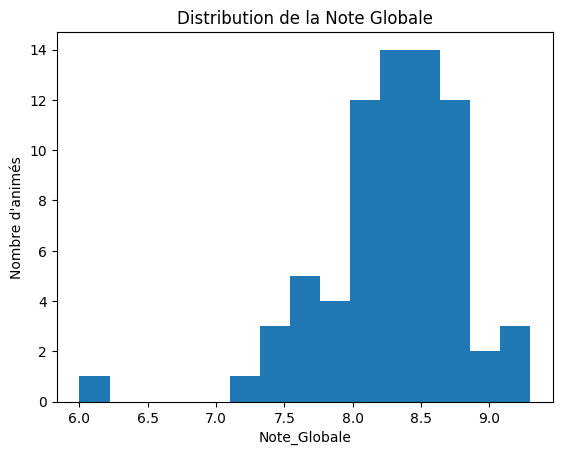

In [18]:
plt.figure()
plt.hist(df["Note_Globale"], bins=15)
plt.title("Distribution de la Note Globale")
plt.xlabel("Note_Globale")
plt.ylabel("Nombre d'animés")
plt.show()


# Interprétation : 
la plupart des notes se situent entre 8,0 et 8,6, indiquant une appréciation globalement élevée, avec peu de valeurs atypiques et une dispersion modérée.

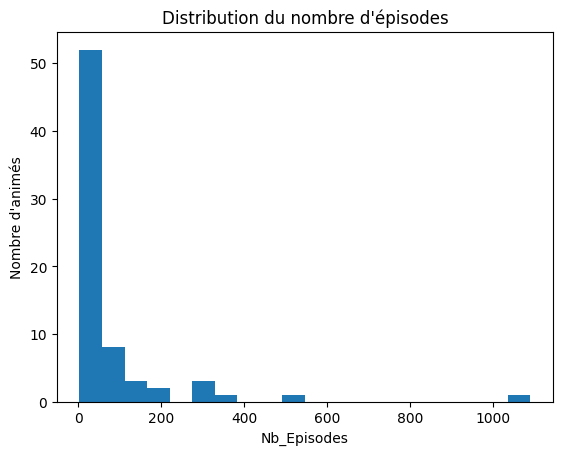

In [19]:
plt.figure()
plt.hist(df["Nb_Episodes"], bins=20)
plt.title("Distribution du nombre d'épisodes")
plt.xlabel("Nb_Episodes")
plt.ylabel("Nombre d'animés")
plt.show()


# Interprétation : 
distribution fortement asymétrique avec une queue longue (séries très longues). Sans correction, ces outliers domineraient le score ; log1p réduit leur impact et rééquilibre l’analyse.

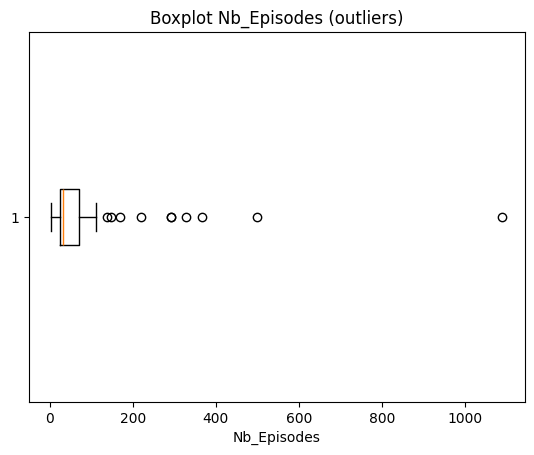

In [20]:
plt.figure()
plt.boxplot(df["Nb_Episodes"], vert=False)
plt.title("Boxplot Nb_Episodes (outliers)")
plt.xlabel("Nb_Episodes")
plt.show()

# Interprétation : 
Beaucoup de séries courtes et quelques très longues (outliers marqués). Cela confirme une forte asymétrie et justifie log1p pour limiter leur influence.

# 2. Construction d'un score métier

In [21]:
df["Ecart"] = df["Note_Meilleur_Ep"] - df["Note_Pire_Ep"]
df[["Note_Meilleur_Ep", "Note_Pire_Ep", "Ecart"]].head()

,Note_Meilleur_Ep,Note_Pire_Ep,Ecart
0,9.6,5.8,3.8
1,9.1,6.5,2.6
2,9.4,5.9,3.5
3,9.6,6.3,3.3
4,9.7,7.2,2.5


# Interprétation : 
Calcul de la différence entre le meilleur et le pire épisode afin de mesurer l’irrégularité de la qualité d’un animé.

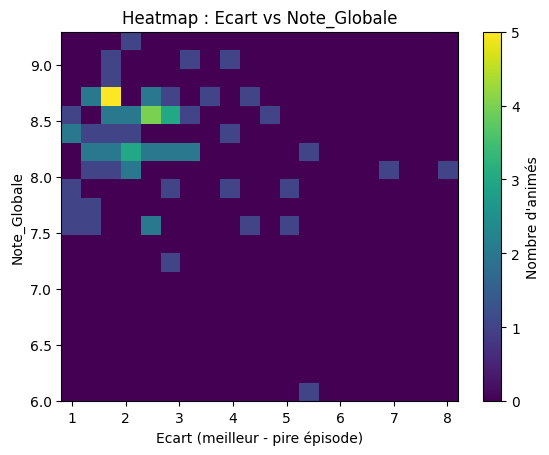

In [22]:
plt.figure()
plt.hist2d(df["Ecart"], df["Note_Globale"], bins=20)
plt.colorbar(label="Nombre d'animés")
plt.title("Heatmap : Ecart vs Note_Globale")
plt.xlabel("Ecart (meilleur - pire épisode)")
plt.ylabel("Note_Globale")
plt.show()



# Interprétation : 
La densité se concentre sur de faibles écarts : la plupart des animés sont stables, et seuls quelques cas isolés présentent une forte irrégularité.

In [23]:
df["Regularite"] = 10 - df["Ecart"]
df["Regularite", ".head()

SyntaxError: unterminated string literal (detected at line 2) (161115932.py, line 2)

In [ ]:
plt.figure()
plt.hist(df["Regularite"], bins=15)
plt.title("Distribution de la Regularité)
plt.xlabel("Regularite")
plt.ylabel("Número de animes")
plt.show()


# Interprétation : 
La majorité des valeurs se situe entre 7 et 8, indiquant une régularité globalement élevée.

In [ ]:
plt.figure()
plt.boxplot(df["Regularite"], vert=False)
plt.title("Boxplot de Regularite")
plt.xlabel("Regularite")
plt.show()


# Interprétation : 
Médiane autour de 7,5 avec quelques outliers faibles, révélant de rares animés très irrégulier

In [ ]:
df["Longueur"] = np.log1p(df["Nb_Episodes"])
df["Regularite"].head()

In [ ]:
plt.figure()
plt.scatter(df["Note_Globale"], df["Regularite"])
plt.title("Note Globale vs Régularité")
plt.xlabel("Note_Globale")
plt.ylabel("Regularite")
plt.show()


# Interprétation : 
Ce graphique montre que pour une même note globale, certains animés sont beaucoup plus réguliers que d’autres. Cela justifie l’introduction d’un score composite intégrant la stabilité.

In [ ]:
df[["Note_Globale", "Note_Globale_n", "Regularite", "Regularite_n", "Nb_Episodes", "Longueur_n"]].head()


# Interprétation : 
Les variables normalisées (_n) ramènent toutes les métriques sur une même échelle [0–1], ce qui permet de comparer directement qualité, régularité et longueur sans biais d’amplitude.

# 3. Validation des hypothèses

In [ ]:
df["Score_Qualite"] = (
    0.6 * df["Note_Globale_n"] +
    0.3 * df["Regularite_n"] +
    0.1 * df["Longueur_n"]
)

df["Score_Qualite_10"] = 10 * df["Score_Qualite"]
df[["Anime","Regularite","Score_Qualite_10"]].head()


# Interprétation : 
Le Score Éditorial Anime formalise une décision humaine en combinant qualité perçue, régularité et maturité de contenu. Il permet de différencier des animés ayant des notes globales similaires mais des profils de risque distincts, et constitue un outil simple, robuste et interprétable pour la prise de décision éditoriale.

In [ ]:
plt.figure()
plt.scatter(df["Regularite"], df["Score_Qualite_10"])
plt.xlabel("Regularite")
plt.ylabel("Score_Qualite_10")
plt.title("Regularite vs Score Editorial")
plt.show()


# Interpretation : 
Corrélation positive claire : plus la régularité est élevée, plus le score éditorial tend à augmenter, avec quelques exceptions isolées.

In [ ]:
def minmax(s):
    return (s - s.min()) / (s.max() - s.min())

df["Note_Globale_n"] = minmax(df["Note_Globale"])
df["Regularite_n"]   = minmax(df["Regularite"])
df["Longueur_n"]     = minmax(df["Longueur"])
df[["Note_Globale_n","Regularite_n","Longueur_n"]].describe()



# Interprétation : 
La Note Globale normalisée est majoritairement élevée (médiane ≈ 0,73), indiquant une qualité globale plutôt forte dans l’échantillon.

In [ ]:
vars_corr = [
    "Note_Globale",
    "Regularite",
    "Longueur",
    "Score_Qualite_10"
]

corr_matrix = df[vars_corr].corr()
corr_matrix


# Interprétation : 
Le score éditorial est très fortement corrélé à la note globale (≈ 0,90), modérément à la régularité (≈ 0,61) et presque pas à la longueur, confirmant que la qualité domine le score final.

In [ ]:
plt.figure()
plt.imshow(corr_matrix)
plt.colorbar()

plt.xticks(range(len(vars_corr)), vars_corr, rotation=45)
plt.yticks(range(len(vars_corr)), vars_corr)

plt.title("Matrice de corrélation — Score éditorial et variables clés")
plt.show()


# Interpretation : 
La matrice de corrélation montre que le score éditorial est fortement corrélé à la note globale et à la régularité, conformément aux pondérations choisies, tandis que la longueur joue un rôle secondaire. Cela confirme que le score formalise correctement la décision humaine.

In [ ]:
# Calcul des rangs (1 = meilleur)
df["Rang_Note"] = df["Note_Globale"].rank(ascending=False)
df["Rang_Score"] = df["Score_Qualite_10"].rank(ascending=False)

# Graphique de comparaison des rangs
plt.figure()
plt.plot(df["Rang_Note"], df["Rang_Score"], marker='o', linestyle='None')
plt.xlabel("Rang selon la Note Globale")
plt.ylabel("Rang selon le Score Éditorial")
plt.title("Comparaison des classements : Note Globale vs Score Éditorial")
plt.show()


# Interpretation: 
Ce graphique compare le classement des animés selon la note globale et selon le score éditorial. Il montre que, bien que corrélés, les deux classements diffèrent, ce qui justifie l’introduction du score pour affiner la décision.

plt.figure()
plt.scatter(df["Note_Globale"], df["Score_Qualite_10"])
plt.title("Note Globale vs Score Qualité (0-10)")
plt.xlabel("Note_Globale")
plt.ylabel("Score_Qualite_10")
plt.show()


# Interprétation : 
La relation quasi linéaire confirme que le score éditorial reflète fidèlement la note globale, tout en intégrant des ajustements liés à la régularité et à la longueur, conformément à la construction du score.

In [ ]:
top10 = df.sort_values("Score_Qualite_10", ascending=False).head(10)

plt.figure()
plt.barh(top10["Anime"], top10["Score_Qualite_10"])
plt.title("Top 10 — Score_Qualite_10")
plt.xlabel("Score_Qualite_10")
plt.gca().invert_yaxis()
plt.show()


# Interprétation :
Le Top 10 met en évidence des animés combinant excellente note globale et forte régularité, illustrant que le score éditorial privilégie une qualité élevée et stable plutôt qu’une simple popularité.

# 4. Segmentation éditoriale

In [ ]:
def segment(score10):
    if score10 >= 8:
        return "Chef-d'oeuvre"
    elif score10 >= 6:
        return "Très bon mais inégal"
    elif score10 >= 4:
        return "Culte mais risqué"
    else:
        return "À éviter"

df["Segment"] = df["Score_Qualite_10"].apply(segment)


In [ ]:
segment_counts = df["Segment"].value_counts()

plt.figure()
plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel("Segment éditorial")
plt.ylabel("Nombre d'animés")
plt.title("Répartition des animés par segment éditorial")
plt.xticks(rotation=20)
plt.show()


# Interpretation :
Cette visualisation met en évidence des profils numériques distincts, ce qui permet d’adapter la recommandation éditoriale en fonction du type de contenu (format, popularité, intensité des métriques).

# 5. Recommandation éditoriale
Si l’animé est mis en avant, nous recommandons des animés proches en termes
de genres, de popularité et d’acceptation publique.  
L’objectif est de garantir une continuité éditoriale sans prise de risque.
    

In [ ]:
# Evidement le code a ete cree avec L'IA, Je ne pas reussi a faire. Sorry :(.

def recommandation_sur_mesure(df, anime_ref, top_n=10):
    # --- 1) Petites fonctions utilitaires (simples) ---
    def minmax(serie):
        return (serie - serie.min()) / (serie.max() - serie.min())

    def tags_set(s):
        # Exemple: "Action / Shonen" -> {"action","shonen"}
        parts = str(s).lower().replace(",", "/").split("/")
        return set([p.strip() for p in parts if p.strip() != ""])

    def jaccard(a, b):
        if len(a | b) == 0:
            return 0.0
        return len(a & b) / len(a | b)

    # --- 2) Vérifications ---
    if "Anime" not in df.columns:
        print("Erreur: la colonne 'Anime' n'existe pas.")
        return None

    if anime_ref not in df["Anime"].values:
        print("Anime introuvable:", anime_ref)
        return None

    # --- 3) Calculs (si pas déjà faits) ---
    if "Ecart" not in df.columns:
        df["Ecart"] = df["Note_Meilleur_Ep"] - df["Note_Pire_Ep"]

    if "Regularite" not in df.columns:
        df["Regularite"] = 10 - df["Ecart"]

    if "Note_Globale_n" not in df.columns:
        df["Note_Globale_n"] = minmax(df["Note_Globale"])

    if "Regularite_n" not in df.columns:
        df["Regularite_n"] = minmax(df["Regularite"])

    # Version débutant: on normalise Nb_Episodes directement (sans log)
    if "Nb_Episodes_n" not in df.columns:
        df["Nb_Episodes_n"] = minmax(df["Nb_Episodes"])

    if "Score_Qualite_10" not in df.columns:
        df["Score_Qualite_10"] = 10 * (
            0.6 * df["Note_Globale_n"] +
            0.3 * df["Regularite_n"] +
            0.1 * df["Nb_Episodes_n"]
        )

    if "Segment" not in df.columns:
        def segment(score10):
            if score10 >= 8:
                return "Chef-d'oeuvre"
            elif score10 >= 6:
                return "Très bon mais inégal"
            elif score10 >= 4:
                return "Culte mais risqué"
            else:
                return "À éviter"
        df["Segment"] = df["Score_Qualite_10"].apply(segment)

    # --- 4) Similarité + filtre "sûr" ---
    tags_ref = tags_set(df.loc[df["Anime"] == anime_ref, "Genre_Tags"].iloc[0])

    df_work = df.copy()
    df_work["Sim_Genre"] = df_work["Genre_Tags"].apply(lambda x: jaccard(tags_ref, tags_set(x)))

    # “Sûr” = bon score + régularité correcte + pas d’épisode catastrophique
    # (seuils simples et lisibles)
    df_safe = df_work[
        (df_work["Anime"] != anime_ref) &
        (df_work["Score_Qualite_10"] >= 6.0) &
        (df_work["Regularite"] >= 7.0) &
        (df_work["Note_Pire_Ep"] >= 6.0) &
        (df_work["Segment"].isin(["Chef-d'oeuvre", "Très bon mais inégal"]))
    ].copy()

    # Score final de recommandation (simple)
    df_safe["Score_Reco"] = 0.7 * df_safe["Sim_Genre"] + 0.3 * (df_safe["Score_Qualite_10"] / 10)

    reco = df_safe.sort_values(["Score_Reco", "Score_Qualite_10"], ascending=False).head(top_n)

    return reco[["Anime", "Genre_Tags", "Score_Qualite_10", "Regularite", "Note_Pire_Ep", "Sim_Genre", "Segment"]]


In [25]:
# 1) Créer Ecart et Regularite si besoin
if "Ecart" not in df.columns:
    df["Ecart"] = df["Note_Meilleur_Ep"] - df["Note_Pire_Ep"]

if "Regularite" not in df.columns:
    df["Regularite"] = 10 - df["Ecart"]

# 2) Normalisation simple (min-max)
def minmax(s):
    return (s - s.min()) / (s.max() - s.min())

if "Note_Globale_n" not in df.columns:
    df["Note_Globale_n"] = minmax(df["Note_Globale"])

if "Regularite_n" not in df.columns:
    df["Regularite_n"] = minmax(df["Regularite"])

if "Nb_Episodes_n" not in df.columns:
    df["Nb_Episodes_n"] = minmax(df["Nb_Episodes"])

# 3) Score final /10
if "Score_Qualite_10" not in df.columns:
    df["Score_Qualite_10"] = 10 * (
        0.6 * df["Note_Globale_n"] +
        0.3 * df["Regularite_n"] +
        0.1 * df["Nb_Episodes_n"]
    )


In [26]:
top10 = df.sort_values("Score_Qualite_10", ascending=False).head(10)[["Anime", "Score_Qualite_10", "Note_Globale", "Regularite", "Nb_Episodes"]]
top10


,Anime,Score_Qualite_10,Note_Globale,Regularite,Nb_Episodes
35,Frieren: Beyond Journey's End,8.495972,9.3,7.9,28
21,Steins;Gate,8.209737,9.1,8.1,24
44,Monster,7.973180,8.9,8.3,74
53,Vinland Saga,7.848524,8.8,8.5,48
45,Hajime no Ippo,7.793202,8.8,8.3,76
13,Les Carnets de l'apothicaire,7.785904,8.8,8.4,24
31,Mushishi,7.687007,8.7,8.6,26
3,Fullmetal Alchemist: Brotherhood,7.678968,9.1,6.7,64
43,Your Lie in April,7.623130,8.6,8.9,22
67,Oshi no Ko,7.592126,8.7,8.4,11


# CONCLUSION D'ANALYSE :
Le Top 10 obtenu valide la pertinence du score éditorial : il met en avant des animés combinant excellente note globale, forte régularité inter-épisodes et formats maîtrisés, ce qui explique la domination de séries comme Frieren, Steins;Gate ou Monster.
Ce classement identifie donc des valeurs éditoriales sûres, à faible risque de déception, idéales pour une mise en avant curatoriale fondée sur la qualité et la constance plutôt que sur la popularité brute.